In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [31]:
# reading the CSV file
x= pd.read_csv("sms-spam.csv")

#displaying the dataframe
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [32]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [33]:
#dataset size - 5572 rows × 5 columns
x.shape
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
x.rename(columns={'v1':'result', 'v2':'input'}, inplace=True)
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [35]:
# result has categorical labels, we need to convert it into numerical values - encoding 
#for that we will be using 'LabelEncoder' from sklearn

In [36]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])

x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
x.isnull().sum()

result    0
input     0
dtype: int64

In [38]:
x.duplicated().sum()

np.int64(403)

In [39]:
x=x.drop_duplicates(keep='first')
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA - Exploratory Data Analysis

In [40]:
#the given problem is a classification problem, so we need to understand the data first by performance of
#the dataset has only 2 columns, so less analysis required

In [41]:
#checking the number of SPAM vs not SPAM messages
x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [42]:
#out of 5169 datavalues, 653 are SPAM

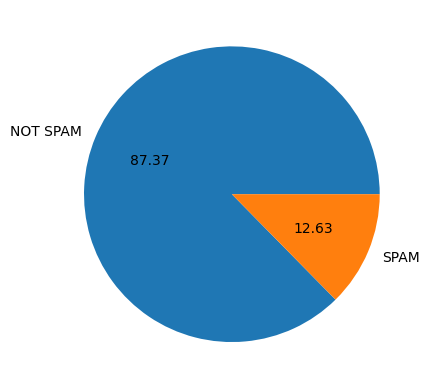

In [43]:
plt.pie(x['result'].value_counts(),labels=['NOT SPAM','SPAM'],autopct='%0.2f')
plt.show()

In [44]:
import warnings 
warnings.filterwarnings('ignore')

In [45]:
#punkt package includes pre-trained models for tokenizing text in many languages
nltk.download('punkt') # punctuation kit

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shreya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
#creating a new column with count of characters
x['countCharacters'] = x['input'].apply(len)

#creating a new column with count of words
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences 

In [47]:
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
#extracting the 5 number of the 3 new column values
x[['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
#for not SPAM
x[x['result'] == 0][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
#for SPAM
x[x['result'] == 1][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

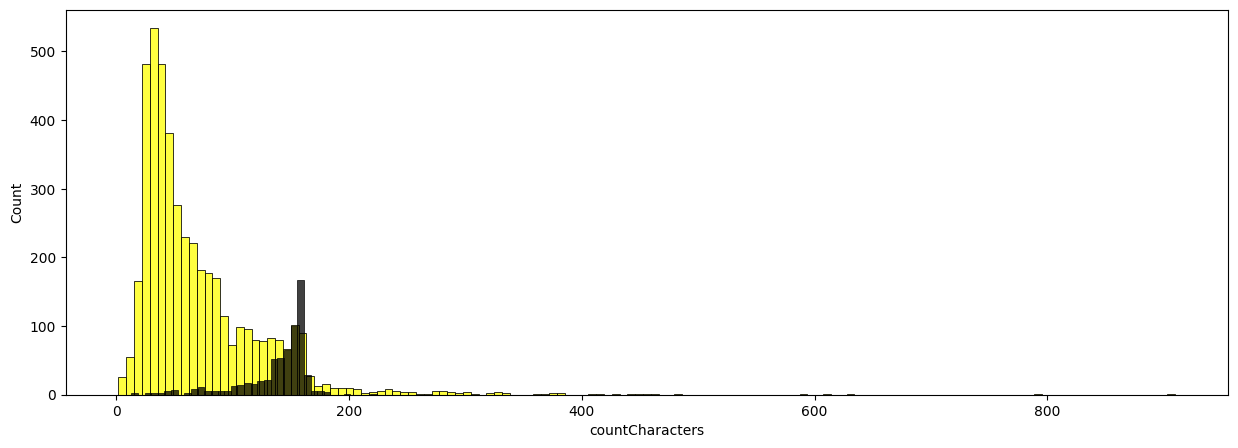

In [51]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countCharacters'], color = "black")

#black -> SPAM, yellow -> not SPAM

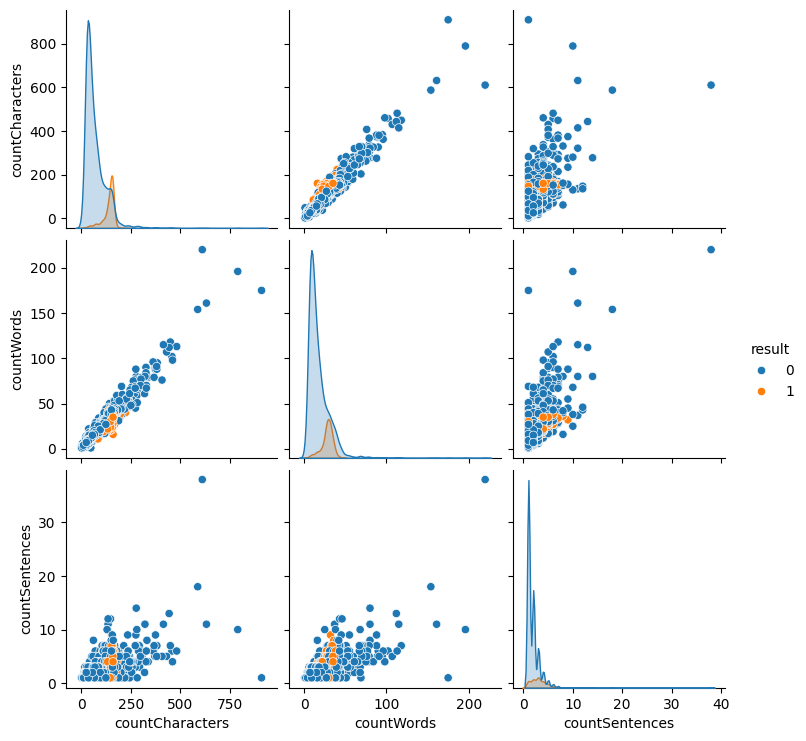

In [52]:
#finding relationship between the columns
sns.pairplot(x, hue='result')

# Data processing

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special charactes
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC =list()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text  = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [55]:
#will create a new column to store the transformed text -> 'processed'
x['processed'] = x['input'].apply(transform_text)

x.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
#will be creating word cloud for data visualization to display the most frequently occuring words in the processed dataset.
#using 'WordCloud' class

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

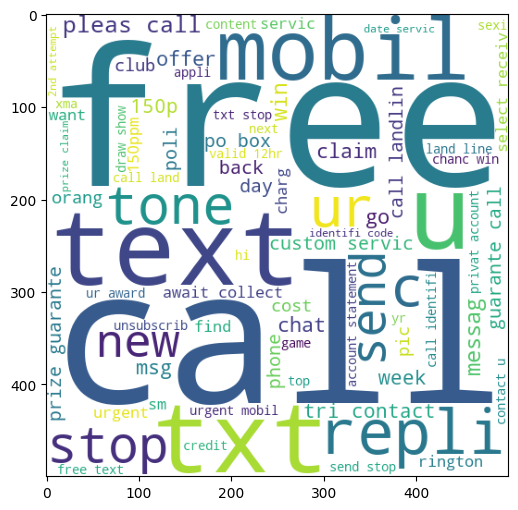

In [57]:
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(x[x['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying 
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

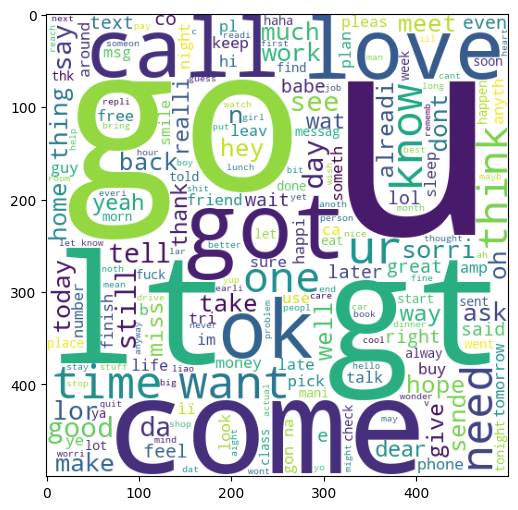

In [58]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(x[x['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying 
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [59]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in x[x['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)
        
spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [60]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40) 


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [61]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

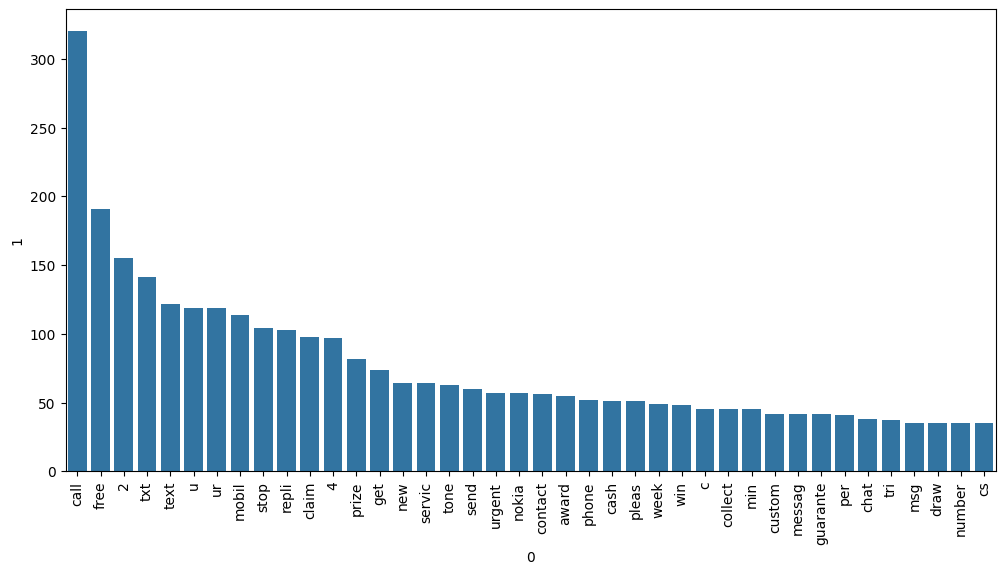

In [62]:
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12,6))
sns.barplot(data = mostCommonSPAM, x=0,y=1)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [63]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [64]:
#Transforming the data of processed column
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape

(5169, 6708)

In [65]:
#storing the values of the 'result' column
y = x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [66]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 49)

In [67]:
#creating the objects for the models
gnb =  GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [69]:
#training the dataset for MultionomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [70]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [71]:
#we have to focus mainly on 'precision value'
#the max precision we got is 9.45 with 9.64 as accuracy

In [72]:
#using 'TfidVectorizer' for vectorization
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['processed']).toarray()

#storing the values of the 'result' column
y = x['result'].values

#splitting the training and testing dataset
X_train, y_train, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [73]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8626692456479691
[[775 124]
 [ 18 117]]
0.4854771784232365


In [74]:
#training the dataset for MultionomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9680851063829787
[[892   7]
 [ 26 109]]
0.9396551724137931


In [75]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [76]:
#modle is PREPARED.
#now we have to host the website, for that pipelinig needs to be done
#the text which we will get, has to be transformed first, then vectorized and trained

In [77]:
#we will pickle 2 files
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

In [78]:
pickle.dump(tf, open('vectorizer.pkl','wb'))